In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project Machine Learning/udemy_courses.csv')
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [ ]:
df.columns = df.columns.str.strip()
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [ ]:
df.drop(['url', 'course_title', 'published_timestamp'], axis=1, inplace=True)

In [ ]:
df.dtypes

,0
course_id,int64
is_paid,bool
price,int64
num_subscribers,int64
num_reviews,int64
num_lectures,int64
level,object
content_duration,float64
subject,object


In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['is_paid']= label_encoder.fit_transform(df['is_paid'])
df['level']= label_encoder.fit_transform(df['level'])
df['subject']= label_encoder.fit_transform(df['subject'])

In [ ]:
print(df['is_paid'].unique())
print(df['level'].unique())
print(df['subject'].unique())

[1 0]
[0 3 1 2]
[0 1 2 3]


In [ ]:
df.head()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,1070968,1,200,2147,23,51,0,1.5,0
1,1113822,1,75,2792,923,274,0,39.0,0
2,1006314,1,45,2174,74,51,3,2.5,0
3,1210588,1,95,2451,11,36,0,3.0,0
4,1011058,1,200,1276,45,26,3,2.0,0


In [ ]:
# from ydata_profiling import ProfileReport

# # Generate the profile report
# profile = ProfileReport(df,
#                         title="Data Profiling Report",
#                         explorative=True,
#                         minimal=False)

# # Save the report to an HTML file
# profile.to_file("data_profiling_report.html")

# print("Data profiling report has been generated and saved as 'data_profiling_report.html'")

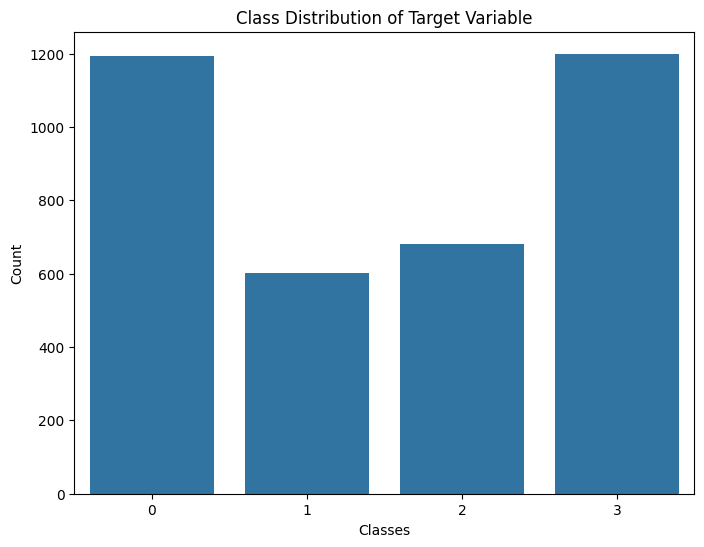

In [ ]:

# Plot the class distribution as a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='subject', data=df)
plt.title('Class Distribution of Target Variable')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Step 1: Separate features and target
X = df.drop(columns=['subject'])  # Features
y = df['subject']  # Target

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

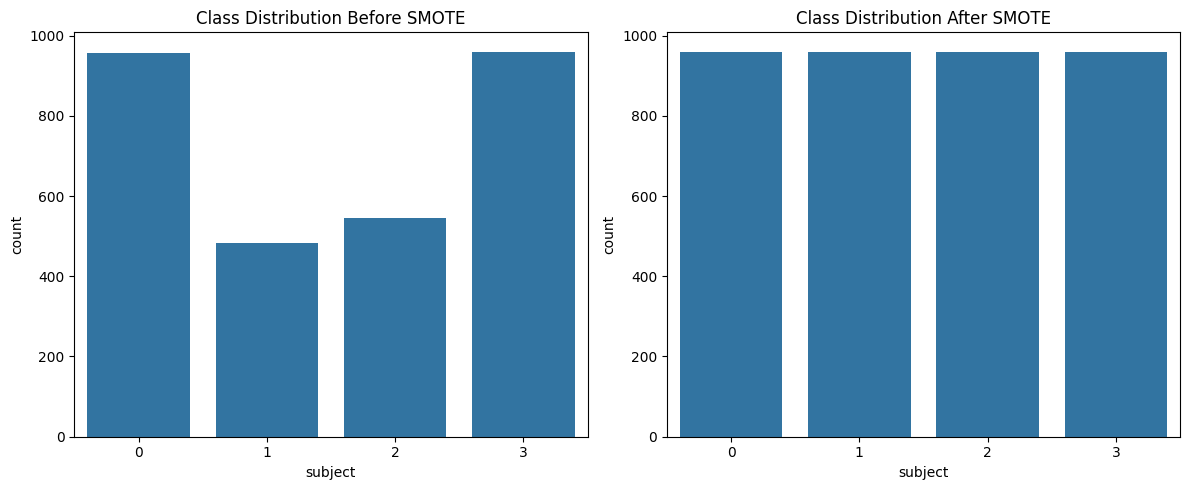

In [ ]:
# Plot the class distribution before and after SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE")

plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled)
plt.title("Class Distribution After SMOTE")

plt.tight_layout()
plt.show()

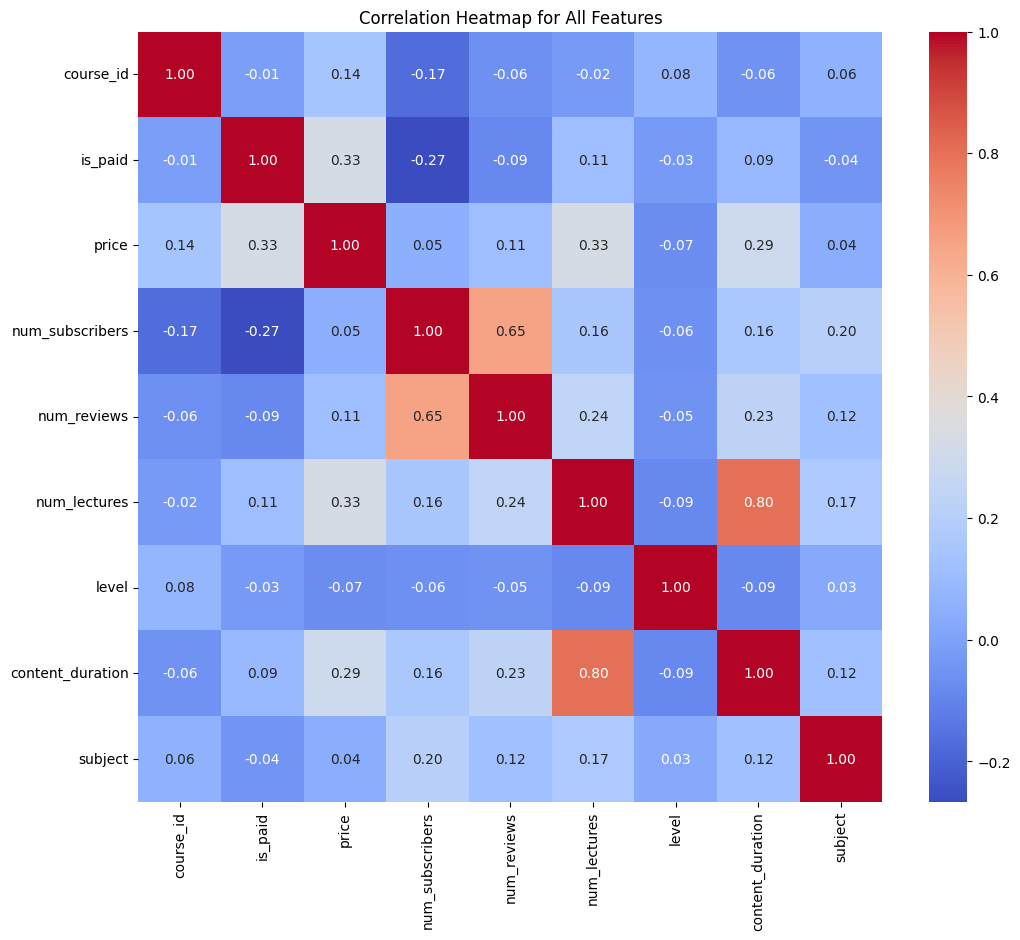

In [ ]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(
    correlation_matrix,
    annot=True,         # Annotate the heatmap with correlation coefficients
    fmt=".2f",          # Format to 2 decimal places
    cmap="coolwarm",    # Use the "coolwarm" color scheme
    cbar=True           # Show color bar
)

plt.title('Correlation Heatmap for All Features')
plt.show()

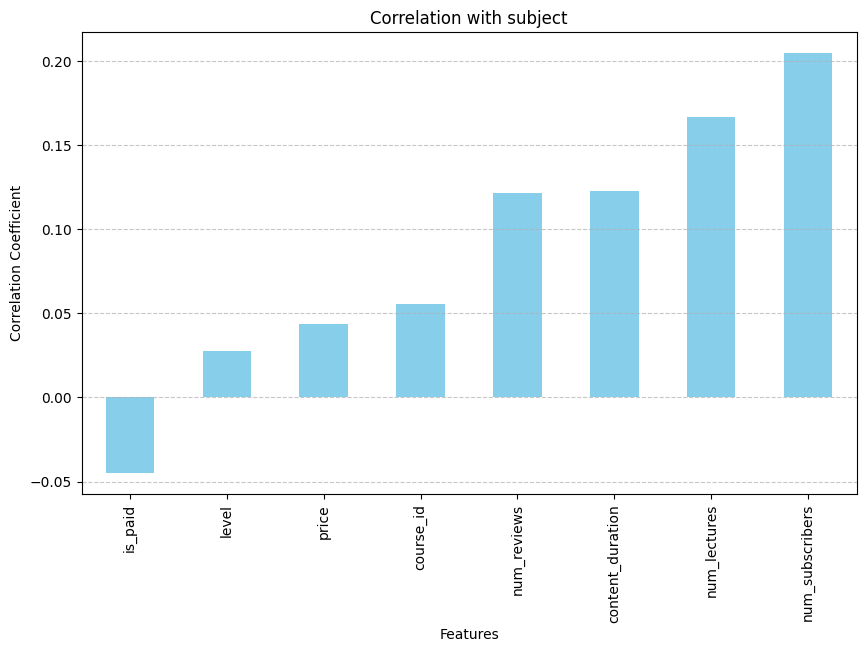

In [ ]:
%matplotlib inline
# Compute correlation with a specific column
target_column = "subject"  # Replace with your target column name
correlations = df.corr()[target_column].drop(target_column)  # Exclude the target itself

# Plot the correlations as a bar chart
plt.figure(figsize=(10, 6))
correlations.sort_values().plot(kind="bar", color="skyblue")
plt.title(f"Correlation with {target_column}")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df_selected_features = df[['num_reviews', 'content_duration', 'num_lectures', 'num_subscribers','subject']]

In [ ]:
df_selected_features.head()

,num_reviews,content_duration,num_lectures,num_subscribers,subject
0,23,1.5,51,2147,0
1,923,39.0,274,2792,0
2,74,2.5,51,2174,0
3,11,3.0,36,2451,0
4,45,2.0,26,1276,0


In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['num_reviews', 'content_duration', 'num_lectures', 'num_subscribers']
scaler = StandardScaler()

# Scale only selected columns
df_selected_features[columns_to_scale] = scaler.fit_transform(df_selected_features[columns_to_scale])

df_selected_features.head()

<ipython-input-18-1f177319dba9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features[columns_to_scale] = scaler.fit_transform(df_selected_features[columns_to_scale])


,num_reviews,content_duration,num_lectures,num_subscribers,subject
0,-0.142474,-0.428632,0.216197,-0.110509,0
1,0.819759,5.766625,4.642865,-0.042635,0
2,-0.087947,-0.263425,0.216197,-0.107668,0
3,-0.155303,-0.180822,-0.081561,-0.078519,0
4,-0.118952,-0.346029,-0.280066,-0.202166,0


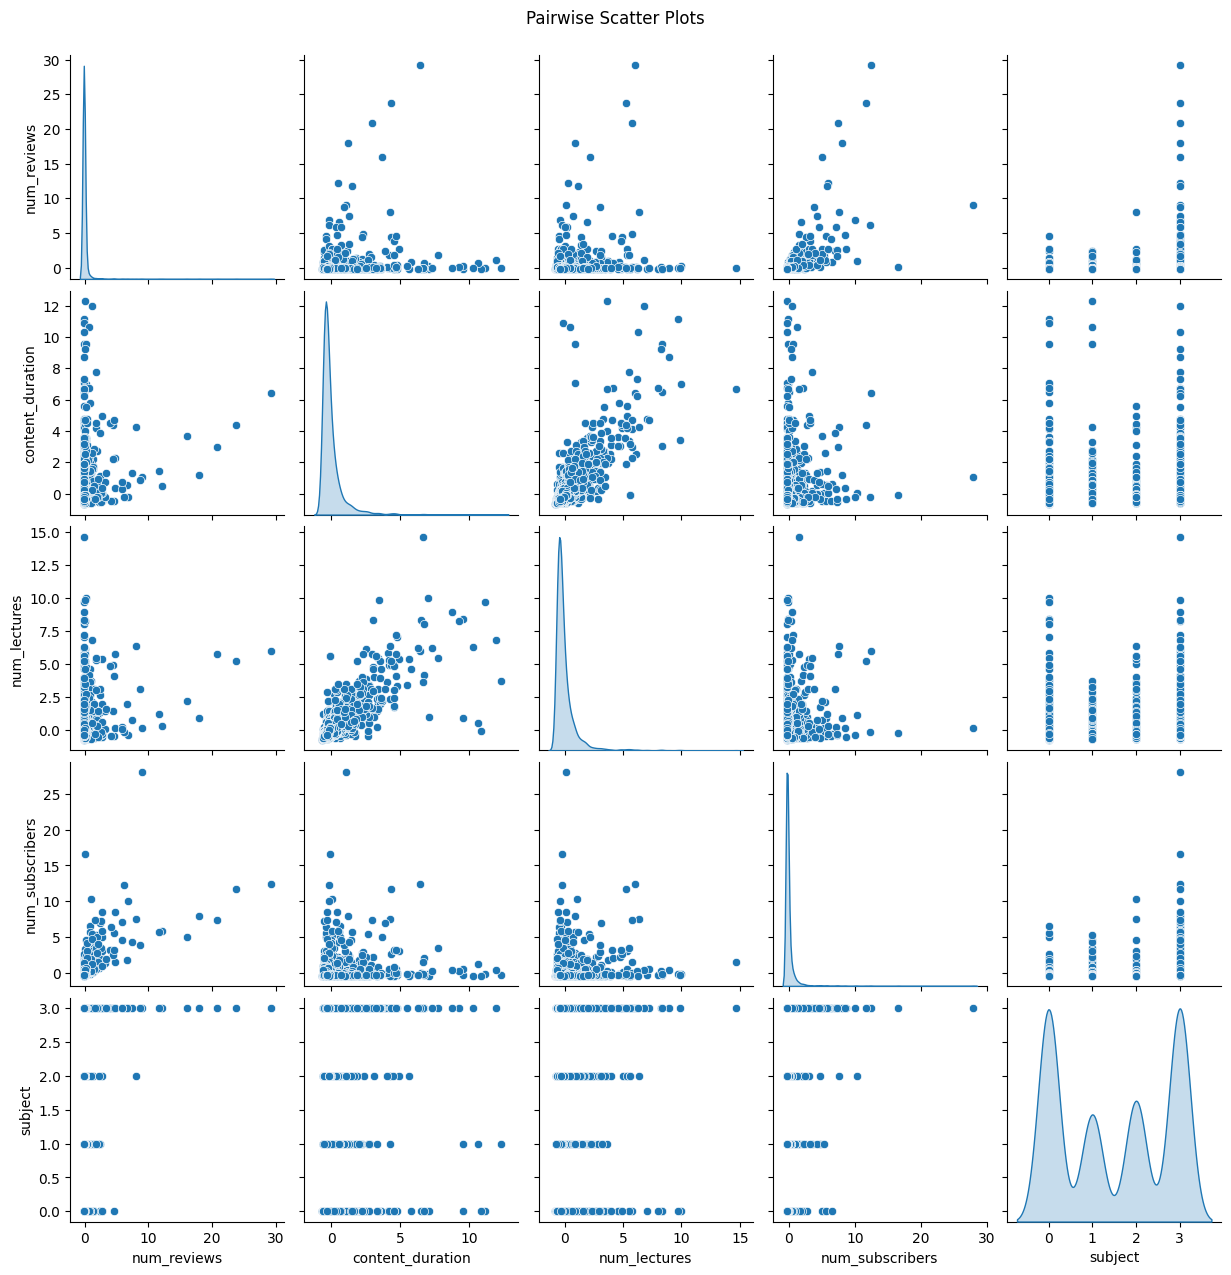

In [ ]:
# Create a pairplot
sns.pairplot(df_selected_features, diag_kind='kde')  # KDE for diagonal plots
plt.suptitle("Pairwise Scatter Plots", y=1.02)
plt.show()

<ipython-input-20-4a1d241c2177>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features[f"{col}_boxcox"] = transformed
<ipython-input-20-4a1d241c2177>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features[f"{col}_boxcox"] = transformed
<ipython-input-20-4a1d241c2177>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

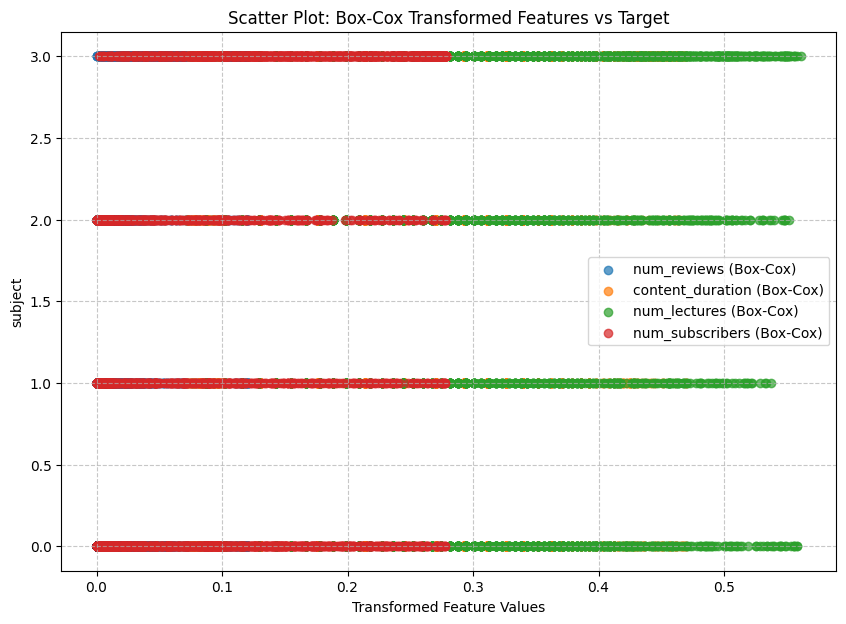

In [ ]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Apply Box-Cox transformation to features
transformed_features = {}
for col in ['num_reviews', 'content_duration', 'num_lectures', 'num_subscribers']:
    # Box-Cox requires positive values; shift if necessary
    shifted_col = df_selected_features[col] - df_selected_features[col].min() + 1  # Shift if min value <= 0
    transformed_features[col], _ = boxcox(shifted_col)

# Add transformed features back to DataFrame
for col, transformed in transformed_features.items():
    df_selected_features[f"{col}_boxcox"] = transformed

# Plot scatter plots of transformed features vs target
plt.figure(figsize=(10, 7))

for col in transformed_features:
    plt.scatter(df_selected_features[f"{col}_boxcox"], df_selected_features['subject'],
                label=f'{col} (Box-Cox)', alpha=0.7)

# Add titles, labels, and legend
plt.title("Scatter Plot: Box-Cox Transformed Features vs Target")
plt.xlabel("Transformed Feature Values")
plt.ylabel("subject")  # Target variable
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [ ]:
df_selected_features.drop(['num_reviews', 'content_duration', 'num_lectures', 'num_subscribers'], axis=1, inplace=True)
df_selected_features.columns

Index(['subject', 'num_reviews_boxcox', 'content_duration_boxcox',
       'num_lectures_boxcox', 'num_subscribers_boxcox'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

# Assuming df_selected_features is your DataFrame
features = ['num_reviews_boxcox', 'num_subscribers_boxcox', 'content_duration_boxcox']  # The columns you want to transform

for col in features:
    # Initialize the PowerTransformer with Yeo-Johnson method
    pt = PowerTransformer(method='yeo-johnson')

    # Apply the transformation and store the result in a new column
    df_selected_features[f'{col}_yeojohnson'] = pt.fit_transform(df_selected_features[[col]])

In [ ]:
df_selected_features = df_selected_features[['num_reviews_boxcox_yeojohnson', 'num_subscribers_boxcox_yeojohnson', 'num_lectures_boxcox', 'content_duration_boxcox_yeojohnson', 'subject']]
df_selected_features.columns


Index(['num_reviews_boxcox_yeojohnson', 'num_subscribers_boxcox_yeojohnson',
       'num_lectures_boxcox', 'content_duration_boxcox_yeojohnson', 'subject'],
      dtype='object')

In [ ]:
# Rename all columns by assigning a new list
df_selected_features.columns = [
    'num_reviews', 'num_subscribers', 'num_lectures', 'content_duration', 'subject'
]

# Print the DataFrame to verify
df_selected_features.head()

,num_reviews,num_subscribers,num_lectures,content_duration,subject
0,-0.035456,0.745209,0.401250,-0.576245,0
1,1.701584,0.951767,0.544380,1.848405,0
2,0.991745,0.755486,0.401250,0.116287,0
3,-0.554879,0.851985,0.347521,0.354713,0
4,0.563415,0.296842,0.294558,-0.185359,0


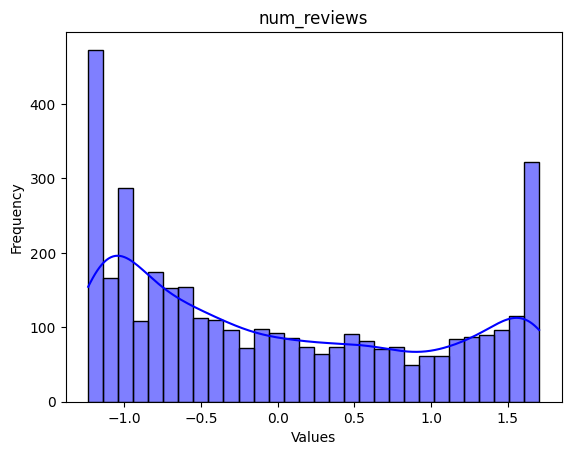

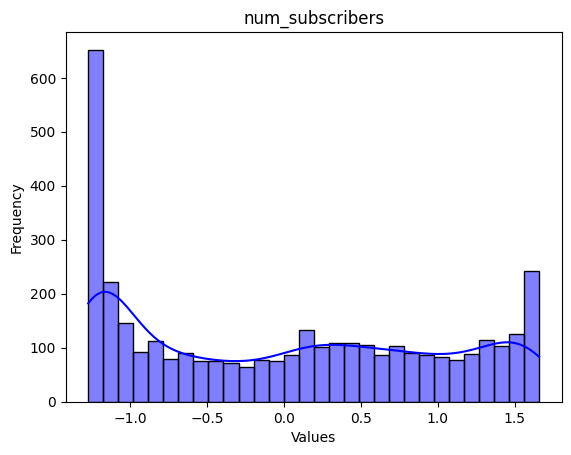

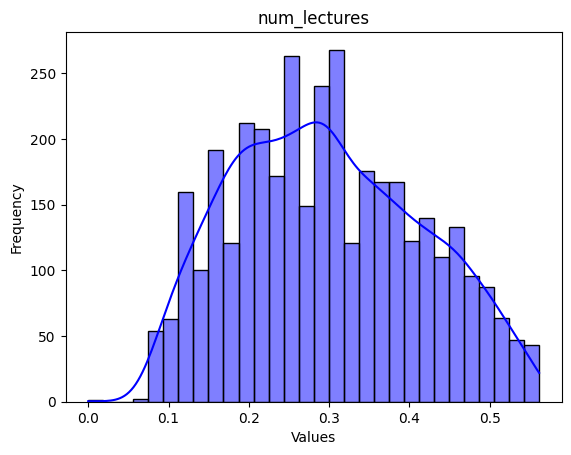

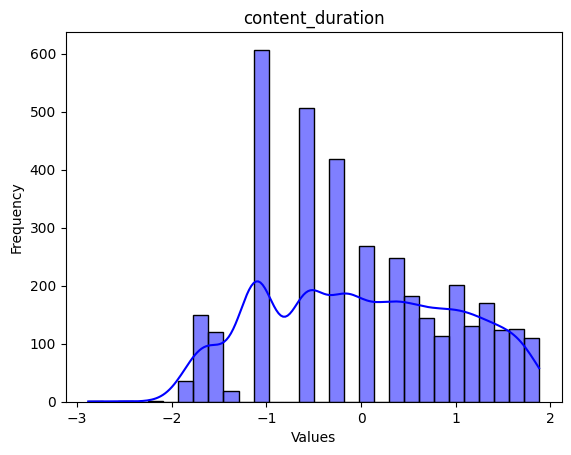

In [ ]:
for col in ['num_reviews', 'num_subscribers', 'num_lectures', 'content_duration']:
    sns.histplot(df_selected_features[col], kde=True, bins=30, color='blue')
    plt.title(f"{col}")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
df_selected_features.describe()

,num_reviews,num_subscribers,num_lectures,content_duration,subject
count,3.678000e+03,3.678000e+03,3678.000000,3.678000e+03,3678.000000
mean,4.636494e-17,2.781897e-16,0.297517,3.863745e-17,1.512507
std,1.000136e+00,1.000136e+00,0.115695,1.000136e+00,1.246035
min,-1.235287e+00,-1.270649e+00,0.000000,-2.882713e+00,0.000000
25%,-9.592376e-01,-1.047443e+00,0.208818,-1.098217e+00,0.000000
50%,-2.296968e-01,9.294484e-03,0.288171,-1.853592e-01,2.000000
75%,9.118351e-01,8.816980e-01,0.385056,8.351906e-01,3.000000
max,1.703760e+00,1.658840e+00,0.561367,1.880460e+00,3.000000


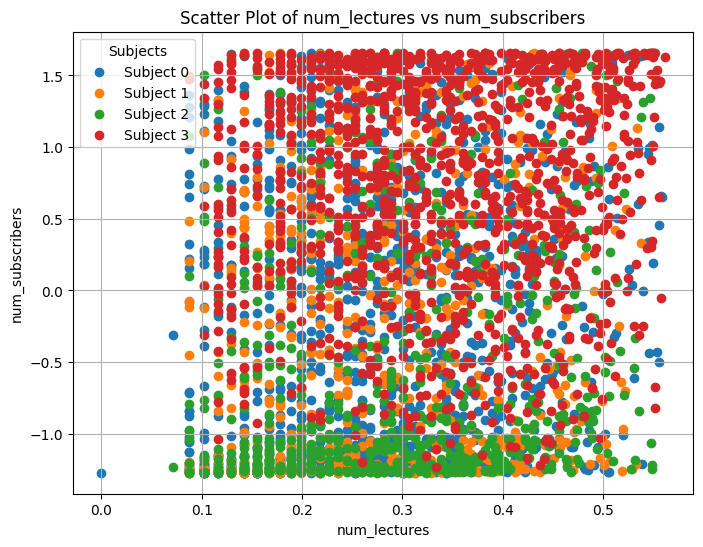

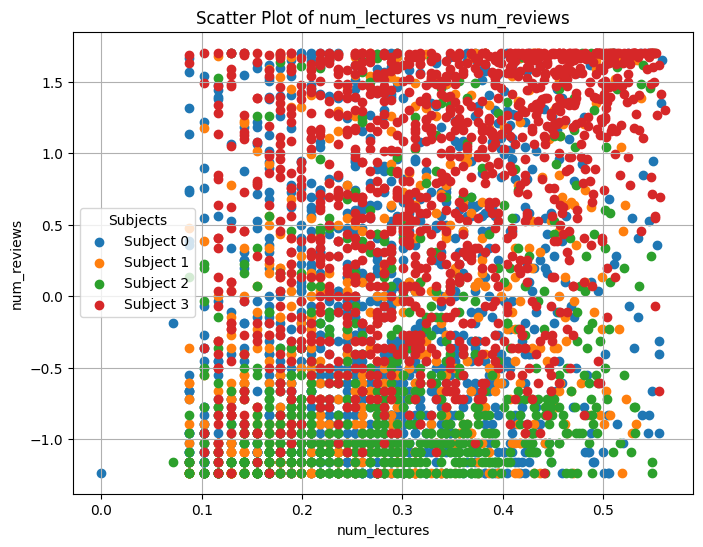

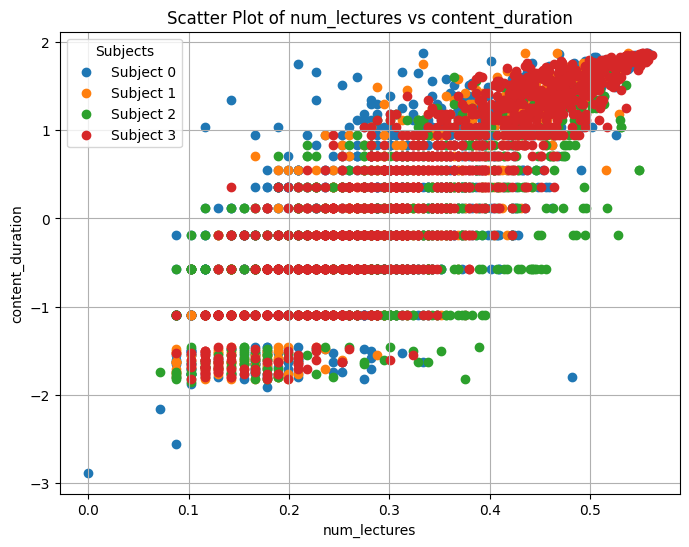

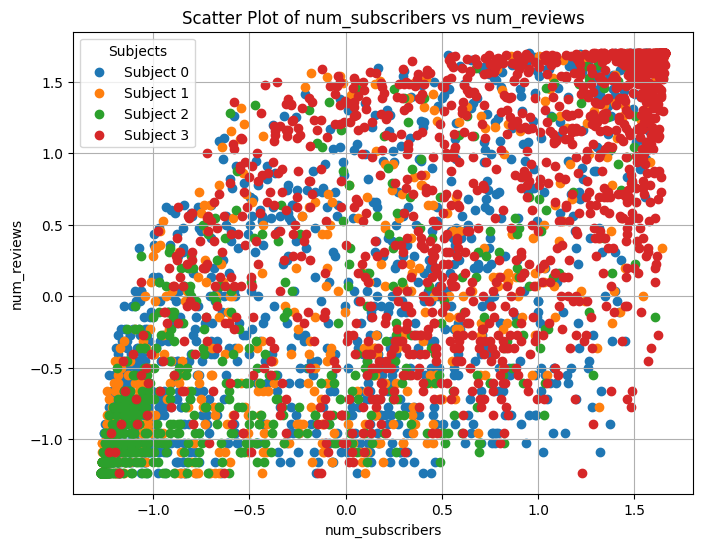

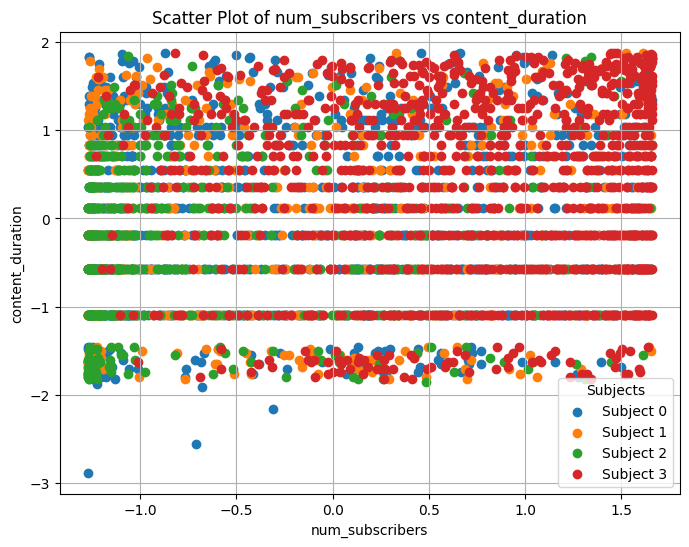

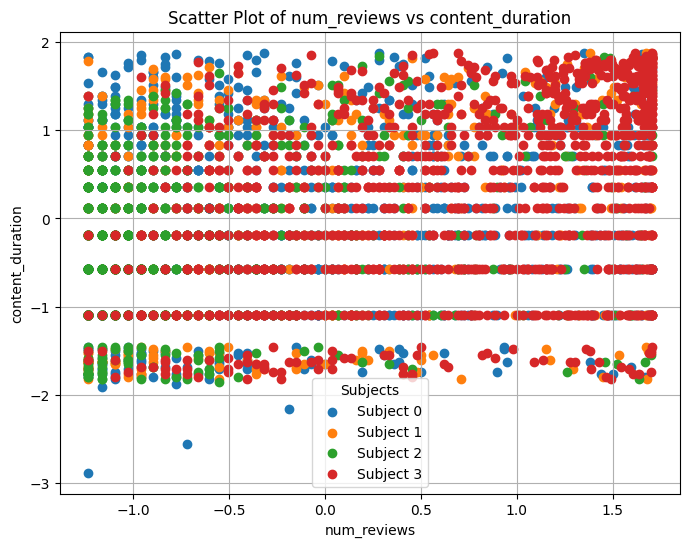

In [ ]:
import matplotlib.pyplot as plt
from itertools import combinations

# Assuming df_selected_features is your DataFrame
features = ['num_lectures', 'num_subscribers', 'num_reviews', 'content_duration']
target = 'subject'

# Loop through all combinations of two features
for x_feature, y_feature in combinations(features, 2):
    # Create a scatter plot for each combination
    plt.figure(figsize=(8, 6))

    for subject in df_selected_features[target].unique():
        # Filter the DataFrame for the current class
        subset = df_selected_features[df_selected_features[target] == subject]

        # Scatter plot for the current class
        plt.scatter(subset[x_feature], subset[y_feature], label=f'Subject {subject}')

    # Add labels, legend, grid, and title
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend(title="Subjects")
    plt.grid(True)
    plt.title(f'Scatter Plot of {x_feature} vs {y_feature}')

    # Show the plot
    plt.show()

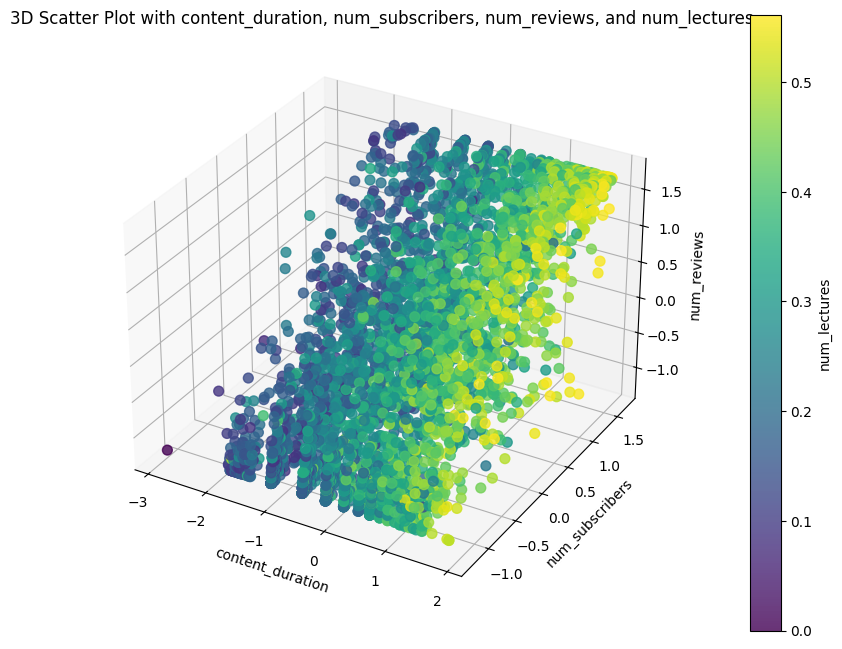

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Select the features for 3D scatter plot and the target
x_feature = 'content_duration'
y_feature = 'num_subscribers'
z_feature = 'num_reviews'
color_feature = 'num_lectures'  # Fourth feature used for coloring
target = 'subject'

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data with color mapped to the fourth feature
scatter = ax.scatter(
    df_selected_features[x_feature],
    df_selected_features[y_feature],
    df_selected_features[z_feature],
    c=df_selected_features[color_feature],  # Use the fourth feature for color
    cmap='viridis',  # Color map for the fourth feature
    s=50,  # Marker size
    alpha=0.8  # Transparency
)

# Add a color bar to indicate the value of the fourth feature
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label(color_feature)

# Add labels, grid, and title
ax.set_xlabel(x_feature)
ax.set_ylabel(y_feature)
ax.set_zlabel(z_feature)
plt.title(f'3D Scatter Plot with {x_feature}, {y_feature}, {z_feature}, and {color_feature}')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Features and target
X = df_selected_features[['num_lectures', 'num_subscribers', 'num_reviews', 'content_duration']]
y = df_selected_features['subject']

degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
transformed_features = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(transformed_features, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)

(2942, 4) (2942,)


Implementing Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

In [ ]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
# Generate classification report
classification_report_str = classification_report(y_test, y_pred)

In [ ]:
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision (weighted):", precision)
print("Recall (weighted):", recall)
print("F1-Score (weighted):", f1)
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.4741847826086957
Precision (weighted): 0.3920706459427507
Recall (weighted): 0.4741847826086957
F1-Score (weighted): 0.42503870398118154

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.56      0.49       264
           1       0.00      0.00      0.00       113
           2       0.36      0.25      0.29       127
           3       0.56      0.72      0.63       232

    accuracy                           0.47       736
   macro avg       0.34      0.39      0.35       736
weighted avg       0.39      0.47      0.43       736



Implementing SVM

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can change 'linear' to 'rbf', 'poly', etc., for other kernels

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

In [ ]:
# Evaluate performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Generate classification report
classification_report_svm = classification_report(y_test, y_pred_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
# Print evaluation metrics
print("SVM Accuracy:", accuracy_svm)
print("SVM Precision (weighted):", precision_svm)
print("SVM Recall (weighted):", recall_svm)
print("SVM F1-Score (weighted):", f1_svm)
print("\nSVM Classification Report:\n", classification_report_svm)

SVM Accuracy: 0.4891304347826087
SVM Precision (weighted): 0.39856773866108913
SVM Recall (weighted): 0.4891304347826087
SVM F1-Score (weighted): 0.4274058908992977

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.53      0.49       264
           1       0.00      0.00      0.00       113
           2       0.38      0.20      0.26       127
           3       0.53      0.84      0.65       232

    accuracy                           0.49       736
   macro avg       0.34      0.39      0.35       736
weighted avg       0.40      0.49      0.43       736



Decision Tree

In [ ]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Evaluate performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Generate classification report
classification_report_dt = classification_report(y_test, y_pred_dt)

In [ ]:
# Print evaluation metrics
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Precision (weighted):", precision_dt)
print("Decision Tree Recall (weighted):", recall_dt)
print("Decision Tree F1-Score (weighted):", f1_dt)
print("\nDecision Tree Classification Report:\n", classification_report_dt)

Decision Tree Accuracy: 0.4048913043478261
Decision Tree Precision (weighted): 0.4059721051738688
Decision Tree Recall (weighted): 0.4048913043478261
Decision Tree F1-Score (weighted): 0.4052247734758533

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.39      0.40       264
           1       0.19      0.20      0.20       113
           2       0.30      0.30      0.30       127
           3       0.56      0.58      0.57       232

    accuracy                           0.40       736
   macro avg       0.37      0.37      0.37       736
weighted avg       0.41      0.40      0.41       736



Random Forest

In [ ]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Generate classification report
classification_report_rf = classification_report(y_test, y_pred_rf)

In [ ]:
# Print evaluation metrics
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision (weighted):", precision_rf)
print("Random Forest Recall (weighted):", recall_rf)
print("Random Forest F1-Score (weighted):", f1_rf)
print("\nRandom Forest Classification Report:\n", classification_report_rf)

Random Forest Accuracy: 0.47146739130434784
Random Forest Precision (weighted): 0.4450034353173116
Random Forest Recall (weighted): 0.47146739130434784
Random Forest F1-Score (weighted): 0.454572199514072

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.49      0.47       264
           1       0.20      0.12      0.15       113
           2       0.36      0.31      0.33       127
           3       0.61      0.71      0.66       232

    accuracy                           0.47       736
   macro avg       0.40      0.41      0.40       736
weighted avg       0.45      0.47      0.45       736



XGBoost

In [ ]:
# Import XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the XGBoost model
xgb_model = XGBClassifier(
    use_label_encoder=False,  # Avoid warning about label encoding
    eval_metric='mlogloss',  # Use log loss for multi-class classification
    random_state=42
)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:37:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Evaluate performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# Generate classification report
classification_report_xgb = classification_report(y_test, y_pred_xgb)


In [ ]:
# Print evaluation metrics
print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Precision (weighted):", precision_xgb)
print("XGBoost Recall (weighted):", recall_xgb)
print("XGBoost F1-Score (weighted):", f1_xgb)
print("\nXGBoost Classification Report:\n", classification_report_xgb)

XGBoost Accuracy: 0.4782608695652174
XGBoost Precision (weighted): 0.45623153727816584
XGBoost Recall (weighted): 0.4782608695652174
XGBoost F1-Score (weighted): 0.4606379256257187

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.52      0.49       264
           1       0.28      0.12      0.16       113
           2       0.36      0.35      0.36       127
           3       0.60      0.67      0.63       232

    accuracy                           0.48       736
   macro avg       0.42      0.42      0.41       736
weighted avg       0.46      0.48      0.46       736

